<a href="https://colab.research.google.com/github/aguusandy/pdi-2024/blob/master/Unidad7_PDI_Segmentacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
import imutils
import time
import math
# scrollbar
import ipywidgets as widgets
from ipywidgets import interact

## Ejercicio 1: Deteccion de bordes

In [ ]:
# ======================== EXERSICE 1 =============================

In [ ]:
img1 = cv2.imread('estanbul.tif',cv2.IMREAD_GRAYSCALE)

In [ ]:
# 1. Implemente el detector de bordes de Prewitt en una funcion que retorne una  imagen binaria con los bordes detectados.
def prewitt_edge_detection(img,edges_selected,threshold=0):
  # defino los kernels de Prewitt para la detección de bordes, en eje x, eje y y de las diagonales
  kernel_x = np.array([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]])
  kernel_y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]])
  kernel_diag_right = np.array([[0, -1, -1],
                                [1, 0, -1],
                                 [1, 1, 0]])
  kernel_diag_left = np.array([[-1, -1, 0],
                              [-1, 0, 1],
                              [0, 1, 1]])
  # aplico los kernels
  edges_x = cv2.filter2D(img, -1, kernel_x)
  edges_y = cv2.filter2D(img, -1, kernel_y)
  edges_diag_r = cv2.filter2D(img, -1, kernel_diag_right)
  edges_diag_l = cv2.filter2D(img, -1, kernel_diag_left)
  # calculo la magnitud de los ejes
  if edges_selected == 0:
    edges = np.sqrt(np.power(edges_x,2) + np.power(edges_y,2) + np.power(edges_diag_r,2) + np.power(edges_diag_l,2))
  else:
    edges = np.sqrt(np.power(edges_x,2) + np.power(edges_y,2) )
  edges = np.uint8(edges)
  # respuesta nula en zonas de gris constante.
  edges[edges < threshold] = 0

  return edges

In [ ]:
def ej1_1(threshold_value):
  threshold = 5
  edges_prewitt_xy = prewitt_edge_detection(img1,0,threshold_value)
  edges_prewitt_all = prewitt_edge_detection(img1,1,threshold_value)

  fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(10,10))
  ax[0].imshow(img1, cmap='gray')
  ax[0].set_title('imagen original')
  ax[1].imshow(edges_prewitt_xy, cmap='gray')
  ax[1].set_title('bordes de prewitt eje x,y')
  ax[2].imshow(edges_prewitt_all, cmap='gray')
  ax[2].set_title('bordes de prewitt')
  plt.show()

interact(ej1_1,threshold_value=widgets.IntSlider(min=0,max=20,step=1,value=1))

interactive(children=(IntSlider(value=1, description='threshold_value', max=20), Output()), _dom_classes=('wid…

<function __main__.ej1_1(threshold_value)>

In [ ]:
# 2. Estudie detalladamente los parametros de la implementacion de Sobel de OpenCV.
# Realice un programa que aplique Sobel y le permita variar parametros:
# • el tipo de dato del resultado (CV 8U; CV 64F)
# • derivadas en x e y (dx, dy)
# • el tamaño de la mascara (ksize)
def sobel_edge_detection(img, ddepth, dx=1, dy=0, ksize=3, edges_selected=0):
  # seteo el data depth
  ddepth = cv2.CV_8U if ddepth == 0 else cv2.CV_64F

  # aplico el filtro sobel
  sobel_x = cv2.Sobel(img, ddepth, dx, dy, ksize=ksize)
  sobel_y = cv2.Sobel(img, ddepth, dy, dx, ksize=ksize)
  # me fijo si quiere los ejes diagonales
  if edges_selected != 0:
    kernel_diag1 = np.array([[ 1,  0, -1], [ 0,  0,  0], [-1,  0,  1]])
    kernel_diag2 = np.array([[ 0,  1,  2], [-1,  0,  1], [-2, -1,  0]])
    sobel_diag1 = cv2.filter2D(img, ddepth, kernel_diag1)
    sobel_diag2 = cv2.filter2D(img, ddepth, kernel_diag2)

  # calculo la magnitud
  if ddepth == cv2.CV_8U:
    if edges_selected != 0:
      sobel_combined = cv2.addWeighted(sobel_x, 0.25, sobel_y, 0.25, 0)
      sobel_combined = cv2.addWeighted(sobel_combined, 1, sobel_diag1, 0.25, 0)
      sobel_combined = cv2.addWeighted(sobel_combined, 1, sobel_diag2, 0.25, 0)
    else:
      sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)
  else:
    if edges_selected != 0:
      sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2 + sobel_diag1**2 + sobel_diag2**2)
    else:
      sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)

  return sobel_combined

In [ ]:
# Cargue la imagen patron bordes.jpg y obtenga los siguientes resultados:
# • perfiles de intensidad que le permitan intuir los resultados posteriores
# • los bordes en direccion x
# • los bordes en direccion y
# • los bordes en todos los sentidos
# • los bordes en todos los sentidos variando ddepth
# • los bordes en todos los sentidos variando el parametro ksize (3, 5 y 7)
# • los bordes utilizando la apertura de Scharr (ksize = FILTER SCHARR (-1)))
# Repita con una imagen real, analice los resultados y comparelos.
img1_2 = cv2.imread('patron_bordes.jpg',cv2.IMREAD_GRAYSCALE)

In [ ]:
def ej1_2(ddepth, dx, dy, ksize, edges_selected):

  edges_sobel = sobel_edge_detection(img1_2, ddepth, dx, dy, ksize, edges_selected)

  fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,10))
  ax[0].imshow(img1_2, cmap='gray')
  ax[0].set_title('imagen original')
  ax[1].imshow(edges_sobel, cmap='gray')
  ax[1].set_title('bordes de sobel')
  plt.show()

# ddepth=cv2.CV_8U, dx=1, dy=0, ksize=3, edges_selected
interact(ej1_2,
        ddepth=widgets.IntSlider(min=0, max=1, step=1, value=1),
        dx=widgets.IntSlider(min=1, max=5, step=1, value=1),
        dy=widgets.IntSlider(min=1, max=5, step=1, value=0),
        ksize=widgets.IntSlider(min=3, max=7, step=2, value=3),
        edges_selected=widgets.IntSlider(min=0, max=1, step=1, value=0),
         )

interactive(children=(IntSlider(value=1, description='ddepth', max=1), IntSlider(value=1, description='dx', ma…

<function __main__.ej1_2(ddepth, dx, dy, ksize, edges_selected)>

In [ ]:
# 3. Estudie la implementacion del detector de bordes Laplacian (2da. derivada) y analice su uso variando la talla del filtro.
def laplacian_edge_detection(img, dtype, ksize=3):
  dtype = cv2.CV_8U if dtype == 0 else cv2.CV_64F

  # aplico el filtro
  laplacian = cv2.Laplacian(img, dtype, ksize=ksize)

  if dtype == cv2.CV_64F:
    laplacian = np.uint8(np.absolute(laplacian))

  return laplacian

In [ ]:
# laplacian_edge_detection(img, dtype, ksize=3)
def ej1_3(dtype, ksize):

  edges_laplacian = laplacian_edge_detection(img1, dtype, ksize)

  fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,10))
  ax[0].imshow(img1, cmap='gray')
  ax[0].set_title('imagen original')
  ax[1].imshow(edges_laplacian, cmap='gray')
  ax[1].set_title('bordes laplaciano, kernel: '+str(ksize))
  plt.show()

# ddepth=cv2.CV_8U, dx=1, dy=0, ksize=3, edges_selected
interact(ej1_3,
        dtype=widgets.IntSlider(min=0, max=1, step=1, value=1),
        ksize=widgets.IntSlider(min=1, max=7, step=2, value=3),
        )

interactive(children=(IntSlider(value=1, description='dtype', max=1), IntSlider(value=3, description='ksize', …

<function __main__.ej1_3(dtype, ksize)>

In [ ]:
# 4. Implemente un programa que le permita evaluar el comportamiento del detector
# de bordes de Canny, mientras varia sus parametros de forma interactiva.
# Evalue los resultados al cambiar el parametro L2gradient.
def canny_edge_detection(img, threshold1, threshold2, apertureSize=3, L2gradient=0):

  L2gradient = False if L2gradient == 0 else True

  edges = cv2.Canny(img, threshold1, threshold2, apertureSize=apertureSize, L2gradient=L2gradient)

  return edges

In [ ]:
# canny_edge_detection(img, threshold1, threshold2, apertureSize=3, L2gradient=False)
def ej1_3(thresholdMin, thresholdMax, apertureSize, L2gradient):

  edges_canny = canny_edge_detection(img1, thresholdMin, thresholdMax, apertureSize, L2gradient)

  fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,10))
  ax[0].imshow(img1, cmap='gray')
  ax[0].set_title('imagen original')
  ax[1].imshow(edges_canny, cmap='gray')
  ax[1].set_title('bordes canny, apertura: '+str(apertureSize))
  plt.show()

# 		double 	threshold1,double 	threshold2,int 	apertureSize = 3,bool 	L2gradient = false
interact(ej1_3,
        thresholdMin=widgets.IntSlider(min=0, max=50, step=1, value=1),
        thresholdMax=widgets.IntSlider(min=1, max=100, step=1, value=10),
        apertureSize=widgets.IntSlider(min=3, max=7, step=2, value=3),
        L2gradient=widgets.IntSlider(min=0, max=1, step=1, value=0),
        )

interactive(children=(IntSlider(value=1, description='thresholdMin', max=50), IntSlider(value=10, description=…

<function __main__.ej1_3(thresholdMin, thresholdMax, apertureSize, L2gradient)>

In [ ]:
# 5. Cargue la imagen ’mosquito.jpg’ y genere versiones con ruido impulsivo unimodal (variando el gris en que aparece) y
# con ruido gaussiano (µ = 0) para distintos valores de desvıo estandar.
# Aplique los distintos detectores de bordes a cada caso y compare los desempeños.
# Algunas preguntas de guıa:
# ¿En que zonas (debido a que) funciona mejor y en cuales no?,
# ¿Que sucede con el ruido?,
# ¿Con que tipo de imagenes sacarıa mejor provecho de los metodos?,
# ¿Que tipo de preprocesamientos, de los que ya conoce, se le ocurren que serian utiles?, etc.
img_5 = cv2.imread('mosquito.jpg',cv2.IMREAD_GRAYSCALE)


In [ ]:
def add_impulse_noise(image, noise_level, gray_value):
  noisy_image = image.copy()
  num_noise_pixels = int(noise_level * image.size)
  coords = [np.random.randint(0, i - 1, num_noise_pixels) for i in image.shape]
  noisy_image[coords[0], coords[1]] = gray_value
  return noisy_image

def add_gaussian_noise(image, mean, std_dev):
  gaussian_noise = np.random.normal(mean, std_dev, image.shape)
  noisy_image = image + gaussian_noise
  noisy_image = np.clip(noisy_image, 0, 255)  # Asegurarse de que los valores estén dentro del rango válido
  return noisy_image.astype(np.uint8)

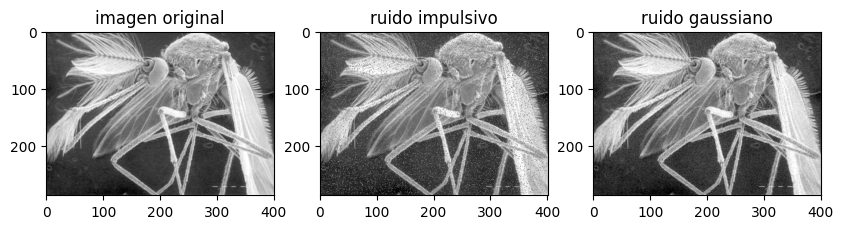

In [ ]:
# añado ruido a las imagenes
img_5_ruido_impulsivo = add_impulse_noise(img_5, noise_level=0.1, gray_value=127)
img_5_ruido_gaussiano = add_gaussian_noise(img_5, mean=0, std_dev=10)

fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(10,10))
ax[0].imshow(img_5,cmap='gray')
ax[0].set_title('imagen original')
ax[1].imshow(img_5_ruido_impulsivo,cmap='gray')
ax[1].set_title('ruido impulsivo')
ax[2].imshow(img_5_ruido_gaussiano,cmap='gray')
ax[2].set_title('ruido gaussiano')
plt.show()

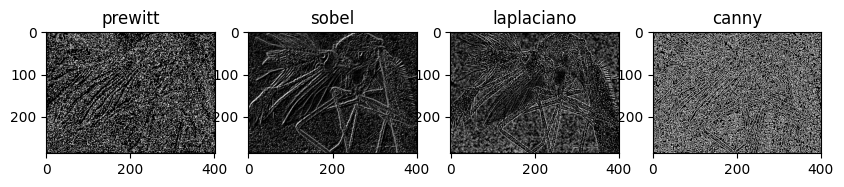

In [ ]:
# aplico la deteccion de bordes con ruido impulsivo
# prewitt
edges_prewitt_all = prewitt_edge_detection(img_5_ruido_impulsivo,1,threshold=12)
# sobel
edges_sobel = sobel_edge_detection(img_5_ruido_impulsivo, ddepth=0, dx=1, dy=0, ksize=3, edges_selected=0)
# laplaciano
edges_laplacian = laplacian_edge_detection(img_5_ruido_impulsivo, dtype=0, ksize=3)
# canny
edges_canny = canny_edge_detection(img_5_ruido_impulsivo, threshold1=10, threshold2=50, apertureSize=3, L2gradient=0)

fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
ax[0].imshow(edges_prewitt_all,cmap='gray')
ax[0].set_title('prewitt')
ax[1].imshow(edges_sobel,cmap='gray')
ax[1].set_title('sobel')
ax[2].imshow(edges_laplacian,cmap='gray')
ax[2].set_title('laplaciano')
ax[3].imshow(edges_canny,cmap='gray')
ax[3].set_title('canny')
plt.show()

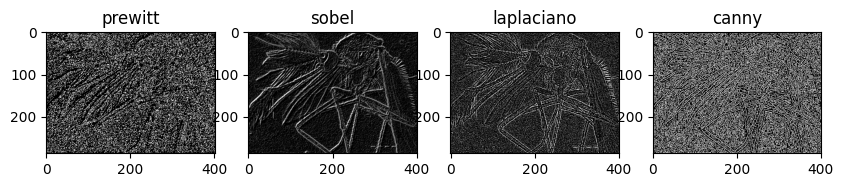

In [ ]:
# aplico la deteccion de bordes con ruido gaussiano
# prewitt
edges_prewitt_all = prewitt_edge_detection(img_5_ruido_gaussiano,1,threshold=12)
# sobel
edges_sobel = sobel_edge_detection(img_5_ruido_gaussiano, ddepth=0, dx=1, dy=0, ksize=3, edges_selected=0)
# laplaciano
edges_laplacian = laplacian_edge_detection(img_5_ruido_gaussiano, dtype=0, ksize=3)
# canny
edges_canny = canny_edge_detection(img_5_ruido_gaussiano, threshold1=10, threshold2=50, apertureSize=3, L2gradient=0)

fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
ax[0].imshow(edges_prewitt_all,cmap='gray')
ax[0].set_title('prewitt')
ax[1].imshow(edges_sobel,cmap='gray')
ax[1].set_title('sobel')
ax[2].imshow(edges_laplacian,cmap='gray')
ax[2].set_title('laplaciano')
ax[3].imshow(edges_canny,cmap='gray')
ax[3].set_title('canny')
plt.show()

In [ ]:
# ======================== EXERSICE 2 =============================

In [ ]:
# exersice 2.1
# 1. Estudie los parametros de la funcion cv.HoughLines, y los formatos en los que devuelve el resultado ([ρ, θ] o [ρ, θ, votes]).
# Implemente un algoritmo que haga uso de esta funcion, debe permitir ajustar el rango de los angulos en la busqueda
# de puntos colineales y el umbral para el acumulador. Consejo: use trackbars.

def hough_lines(img, rho=1, theta=np.pi/180, thresholdHough=50,threshold1=50, threshold2=150):
    """
    img: imagen.
    thresholdHough: Umbral para el acumulador.
    threshold1: threshold minimo para el canny
    threshold2: threshold maximo para el canny
    :return: Imagen con las líneas detectadas dibujadas.
    """
    # deteccion de bordes con canny, se podria cambiar el metodo
    edges = cv2.Canny(img, threshold1, threshold2, apertureSize=3)

    # detectar líneas usando la transformada de Hough probabilística
    lines = cv2.HoughLines(edges, rho=rho, theta=theta, threshold=thresholdHough)

    # Dibujar las líneas detectadas en la imagen original
    result_image = img.copy()
    if lines is not None:
      for line in lines:
        rho, theta = line[0] # [ρ, θ] o [ρ, θ, votes]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(result_image, (x1, y1), (x2, y2), (0, 0, 255), 1)

    return result_image

In [ ]:
img2 = cv2.imread('hand.tif',cv2.IMREAD_GRAYSCALE)

In [ ]:
rho = 1
theta = np.pi/180
def ej2_1( thresholdHough, thresholdMin, thresholdMax):

  edges_hough = hough_lines(img2, rho, theta, thresholdHough,thresholdMin, thresholdMax)

  fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,10))
  ax[0].imshow(img2, cmap='gray')
  ax[0].set_title('imagen original')
  ax[1].imshow(edges_hough, cmap='gray')
  ax[1].set_title('bordes hough, rho: '+str(rho)+' theta: '+str(theta))
  plt.show()

# 		double 	threshold1,double 	threshold2,int 	apertureSize = 3,bool 	L2gradient = false
interact(ej2_1,
        # rho=widgets.IntSlider(min=-90, max=90, step=1, value=0),
        # theta=widgets.IntSlider(min=1, max=100, step=1, value=10),
        thresholdHough=widgets.IntSlider(min=0, max=200, step=1, value=100),
        thresholdMin=widgets.IntSlider(min=0, max=100, step=1, value=50),
        thresholdMax=widgets.IntSlider(min=0, max=200, step=1, value=150),
        )

interactive(children=(IntSlider(value=100, description='thresholdHough', max=200), IntSlider(value=50, descrip…

<function __main__.ej2_1(thresholdHough, thresholdMin, thresholdMax)>

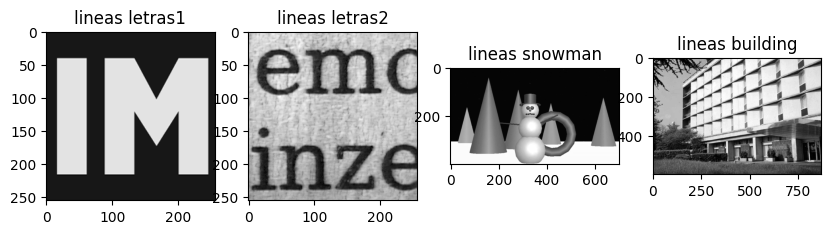

In [ ]:
# exersice 2.2
# 2. Estudie la implementacion de la TH probabilıstica cv.HoughLinesP, sus parametros y el formato vectorial en el que devuelve los resultados.
# Implemente un algoritmo que haga uso de esta funcion, debe permitir ajustar los parametros (minLineLength,maxLineGap) y el umbral para el acumulador.
# Utilice ambas implementaciones con las imagenes ’letras1.tif’, ’letras2.tif’, ’snowman.png’ y ’building.jpg’.
# Explique sus diferencias, ventajas y desventajas. ¿Cuando utilizarıa uno y cuando el otro?

img_letra1 = cv2.imread('letras1.tif',cv2.IMREAD_GRAYSCALE)
img_letra2 = cv2.imread('letras2.tif',cv2.IMREAD_GRAYSCALE)
img_snowman = cv2.imread('snowman.png',cv2.IMREAD_GRAYSCALE)
img_building = cv2.imread('building.jpg',cv2.IMREAD_GRAYSCALE)



In [ ]:
def houghp_lines(img, rho=1, theta=np.pi/180, thresholdHough=50, minLineLength=50, maxLineGap=10, threshold1=50, threshold2=150):

    # detección de bordes
    edges = cv2.Canny(img, threshold1, threshold2, apertureSize=3)

    # detecta líneas utilizando la transformada de Hough probabilística
    lines = cv2.HoughLinesP(edges, rho=rho, theta=theta, threshold=thresholdHough, minLineLength=minLineLength, maxLineGap=maxLineGap)

    # dibujo las líneas
    result_image = img.copy()
    if lines is not None:
      for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(result_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return result_image

In [ ]:

rho = 1
theta = np.pi/180
def ej2_2( thresholdHough, minLineLength, maxLineGap, thresholdMin, thresholdMax):

# detect_lines(img, rho=1, theta=np.pi/180, thresholdHough=50, minLineLength=50, maxLineGap=10, threshold1=50, threshold2=150)
  edges_hough_letra1 = houghp_lines(img_letra1, rho, theta, thresholdHough, minLineLength, maxLineGap, thresholdMin, thresholdMax)
  edges_hough_letra2 = houghp_lines(img_letra2, rho, theta, thresholdHough, minLineLength, maxLineGap, thresholdMin, thresholdMax)
  edges_hough_snowman = houghp_lines(img_snowman, rho, theta, thresholdHough, minLineLength, maxLineGap, thresholdMin, thresholdMax)
  edges_hough_building = houghp_lines(img_building, rho, theta, thresholdHough, minLineLength, maxLineGap, thresholdMin, thresholdMax)

  fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(15,15))
  ax[0].imshow(edges_hough_letra1, cmap='gray')
  ax[0].set_title('lineas letras1')
  ax[1].imshow(edges_hough_letra2, cmap='gray')
  ax[1].set_title('lineas letras2')
  ax[2].imshow(edges_hough_snowman, cmap='gray')
  ax[2].set_title('lineas snowman')
  ax[3].imshow(edges_hough_building, cmap='gray')
  ax[3].set_title('lineas building')
  plt.show()

# 		double 	threshold1,double 	threshold2,int 	apertureSize = 3,bool 	L2gradient = false
interact(ej2_2,
        # rho=widgets.IntSlider(min=-90, max=90, step=1, value=0),
        # theta=widgets.IntSlider(min=1, max=100, step=1, value=10),
        thresholdHough=widgets.IntSlider(min=0, max=200, step=1, value=100),
        minLineLength=widgets.IntSlider(min=0, max=200, step=1, value=50),
        maxLineGap=widgets.IntSlider(min=1, max=200, step=1, value=10),
        thresholdMin=widgets.IntSlider(min=0, max=100, step=1, value=50),
        thresholdMax=widgets.IntSlider(min=0, max=200, step=1, value=150),
        )

interactive(children=(IntSlider(value=100, description='thresholdHough', max=200), IntSlider(value=50, descrip…

<function __main__.ej2_2(thresholdHough, minLineLength, maxLineGap, thresholdMin, thresholdMax)>

In [ ]:
# exersice 2.3
# 3. [Opcional]: implemente un algoritmo de post-proceso, que permita unir pequenas
# discontinuidades en puntos o segmentos colineales, a partir del resultado de la
# transformada de hough. Se debe permitir el ajuste del par´ametro de tolerancia.
# ¿Se le ocurre alguna alternativa en la que se aproveche el tono de gris o el color
# de la imagen original?

In [ ]:
# ======================== EXERSICE 3 =============================

In [127]:
# exercise 3.1
# 1. Algunas alternativas para hacer esto:
# • Implemente el algoritmo siguiendo las indicaciones de la teorıa, haciendo recursiva la funcion de crecimiento.
# Como propiedad a cumplir utilice un rango de grises alrededor del valor de gris de la semilla (cv.inrange()).
# Implemente un componente que le permita variar el rango de inclusion y vicualice el resultado utilizando pseudocolor.
def crecimiento_region_recursivo(image, seed, threshold1, threshold2, max_it=500):
  rows, cols, _ = image.shape
  # rows, cols = image.shape
  print('seed: ',seed)
  # gris de la semilla
  seed_value = image[seed]
  print('value of seed: ',seed_value)
  # máscara binaria con cv2.inRange
  mask = cv2.inRange(image, threshold1, threshold2)
  # máscara para crear las regiones
  visited = np.zeros_like(mask, dtype=bool)
  region = np.zeros_like(mask, dtype=np.uint8)
  iter = 0
  # funcion recursiva para expandir la región a partir de un píxel (y, x).
  stack = [seed]
  while stack:
    y, x = stack.pop()

    if visited[y, x]:
      continue
    visited[y, x] = True

    if mask[y, x]:
      region[y, x] = 255

      # Añadir los vecinos a la pila
      for dy, dx in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        ny, nx = y + dy, x + dx
        if 0 <= ny < rows and 0 <= nx < cols and not visited[ny, nx]:
            stack.append((ny, nx))

  return region

# • Estudie, instale y ponga en funcionamiento alguna funcion de crecimiento de regiones.
# Una alternativa puede ser: https://simpleitk-prototype.readthedocs.io/en/latest/user_guide/segmentation/plot_region_growing.html


In [ ]:
img_3 = cv2.imread('hand.tif',cv2.IMREAD_GRAYSCALE)

In [ ]:

def ej3_1( semillaX, semillaY, thresholdMin, thresholdMax):

  # crecimiento_region_recursivo(img, semilla, threshold1, threshold2)
  img_crecimiento = crecimiento_region_recursivo(img_3, (semillaX,semillaY), thresholdMin, thresholdMax)
  # img_crecimiento = mask = cv2.inRange(img_3, thresholdMin, thresholdMax)

  # cv2.circle(img_3, (semillaX,semillaY), 1, (0, 0, 255), -1)
  fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,12))
  ax[0].imshow(img_3, cmap='gray')
  ax[0].set_title('imagen original')
  ax[1].imshow(img_crecimiento-255, cmap='gray')
  ax[1].set_title('img crecimiento region')
  plt.show()

interact(ej3_1,
        semillaX=widgets.IntSlider(min=0, max=img_3.shape[1]-1, step=1, value=50),
        semillaY=widgets.IntSlider(min=1, max=img_3.shape[0]-1, step=1, value=140),
        thresholdMin=widgets.IntSlider(min=0, max=255, step=1, value=50),
        thresholdMax=widgets.IntSlider(min=0, max=255, step=1, value=150),
        )

interactive(children=(IntSlider(value=50, description='semillaX', max=255), IntSlider(value=140, description='…

<function __main__.ej3_1(semillaX, semillaY, thresholdMin, thresholdMax)>

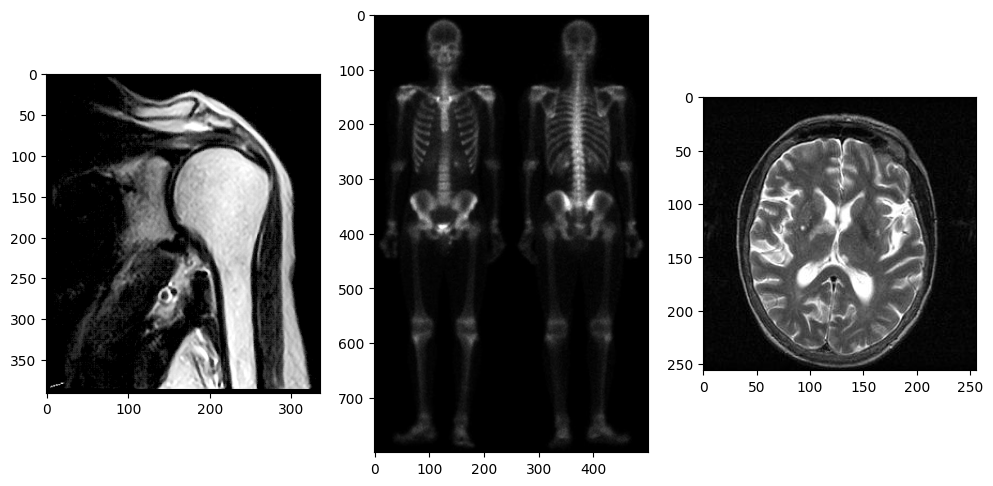

In [5]:
# exersie 3.2
# 2. Cargue imagenes medicas, del repositorio o de internet, y segmente algun area de interes utilizando el metodo de crecimiento de regiones.
# La semilla seleccionada por el usuario (puede hacerlo mediante un click o por teclado).
# Compare este resultado con la aplicacion de la funcion de pseudocolor que implemento en la guıa 4, para el ejercicio 2.
img32_1 = cv2.imread('bone.tif',cv2.IMREAD_GRAYSCALE)
img32_2 = cv2.imread('esqueleto.tif',cv2.IMREAD_GRAYSCALE)
img32_3 = cv2.imread('rmn.jpg',cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,12))
ax[0].imshow(img32_1,cmap='gray')
ax[1].imshow(img32_2,cmap='gray')
ax[2].imshow(img32_3,cmap='gray')
plt.show()

In [9]:
# imagen 1
def ej3_2( semillaX, semillaY, thresholdMin, thresholdMax):
  # crecimiento_region_recursivo(img, semilla, threshold1, threshold2)
  img_crecimiento = crecimiento_region_recursivo(img32_1, (semillaX,semillaY), thresholdMin, thresholdMax)

  fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,12))
  ax[0].imshow(img32_1, cmap='gray')
  ax[0].set_title('imagen original')
  ax[1].imshow(img_crecimiento-255, cmap='gray')
  ax[1].set_title('img crecimiento region')
  plt.show()

interact(ej3_2,
        semillaX=widgets.IntSlider(min=0, max=img32_1.shape[1]-1, step=1, value=50),
        semillaY=widgets.IntSlider(min=1, max=img32_1.shape[0]-1, step=1, value=140),
        thresholdMin=widgets.IntSlider(min=0, max=255, step=1, value=50),
        thresholdMax=widgets.IntSlider(min=0, max=255, step=1, value=150),
        )

interactive(children=(IntSlider(value=50, description='semillaX', max=334), IntSlider(value=140, description='…

<function __main__.ej3_2(semillaX, semillaY, thresholdMin, thresholdMax)>

In [11]:
# imagen 2
def ej3_2( semillaX, semillaY, thresholdMin, thresholdMax):
  # crecimiento_region_recursivo(img, semilla, threshold1, threshold2)
  img_crecimiento = crecimiento_region_recursivo(img32_2, (semillaX,semillaY), thresholdMin, thresholdMax)

  fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,12))
  ax[0].imshow(img32_2, cmap='gray')
  ax[0].set_title('imagen original')
  ax[1].imshow(img_crecimiento, cmap='gray')
  ax[1].set_title('img crecimiento region')
  plt.show()

interact(ej3_2,
        semillaX=widgets.IntSlider(min=0, max=img32_2.shape[1]-1, step=1, value=50),
        semillaY=widgets.IntSlider(min=1, max=img32_2.shape[0]-1, step=1, value=140),
        thresholdMin=widgets.IntSlider(min=0, max=255, step=1, value=50),
        thresholdMax=widgets.IntSlider(min=0, max=255, step=1, value=150),
        )

interactive(children=(IntSlider(value=50, description='semillaX', max=499), IntSlider(value=140, description='…

<function __main__.ej3_2(semillaX, semillaY, thresholdMin, thresholdMax)>

In [12]:
def ej3_2( semillaX, semillaY, thresholdMin, thresholdMax):
  # crecimiento_region_recursivo(img, semilla, threshold1, threshold2)
  img_crecimiento = crecimiento_region_recursivo(img32_3, (semillaX,semillaY), thresholdMin, thresholdMax)

  fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,12))
  ax[0].imshow(img32_3, cmap='gray')
  ax[0].set_title('imagen original')
  ax[1].imshow(img_crecimiento, cmap='gray')
  ax[1].set_title('img crecimiento region')
  plt.show()

interact(ej3_2,
        semillaX=widgets.IntSlider(min=0, max=img32_3.shape[1]-1, step=1, value=50),
        semillaY=widgets.IntSlider(min=1, max=img32_3.shape[0]-1, step=1, value=140),
        thresholdMin=widgets.IntSlider(min=0, max=255, step=1, value=50),
        thresholdMax=widgets.IntSlider(min=0, max=255, step=1, value=150),
        )

interactive(children=(IntSlider(value=50, description='semillaX', max=255), IntSlider(value=140, description='…

<function __main__.ej3_2(semillaX, semillaY, thresholdMin, thresholdMax)>

In [ ]:
# ======================== EXERSICE 4 =============================

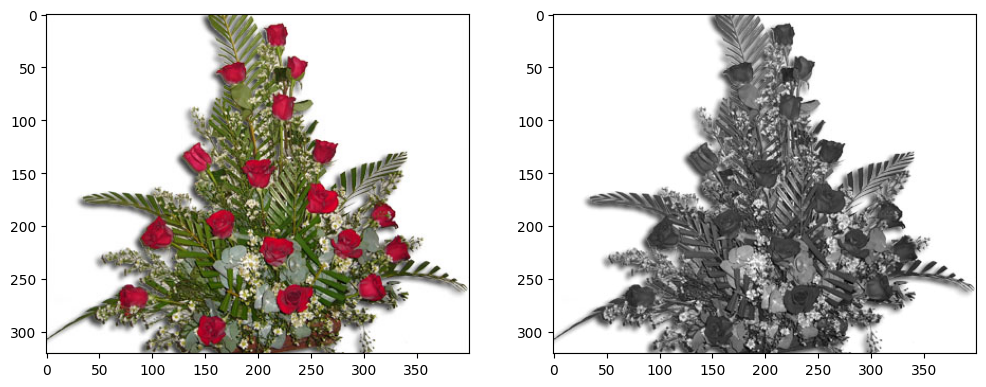

In [60]:
# Segmentacion en color y etiquetado
# El objetivo del ejercicio es poder identificar las rosas presentes en la imagen ’rosas.jpg’ para obtener informacion al respecto.
img4 = cv2.imread('rosas.jpg')
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_RGB2BGR)
img4_hsv = cv2.cvtColor(img4, cv2.COLOR_BGR2HSV)
img4_gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,12))
ax[0].imshow(img4_rgb)
ax[1].imshow(img4_gray,cmap='gray')
plt.show()

In [86]:
# exersice 4.1
# 1. Utilice alguno de los metodos de segmentacion color vistos previamente, y obtenga una mascara binaria con las rosas segmentadas.
seed = (155,200)
threshold = 50
print('valor de la semilla en imagen', img4_hsv[seed])
print('valor de threshold ',threshold)
print('hue de la semilla ',img4_hsv[seed][0])

lower_red = np.array([img4_hsv[seed][0] - threshold, 100, 100])
upper_red = np.array([img4_hsv[seed][0] + threshold, 255, 255])

mask = cv2.inRange(img4_hsv, lower_red, upper_red)

mask_binary = mask // 255

segmented_image = cv2.bitwise_and(img4_hsv, img4_hsv, mask=mask)

valor de la semilla en imagen [173 233 205]
valor de threshold  50
hue de la semilla  173


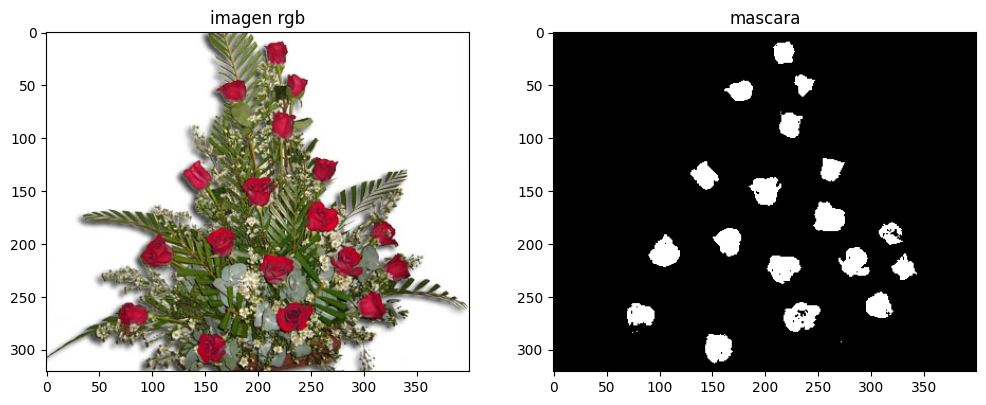

In [87]:
# cv2.circle(img4_rgb, (seed[1],seed[0]), 1, (0, 0, 255), -1)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,12))
ax[0].imshow(img4_rgb)
ax[0].set_title('imagen rgb')
ax[1].imshow(mask_binary,cmap='gray')
ax[1].set_title('mascara')
plt.show()

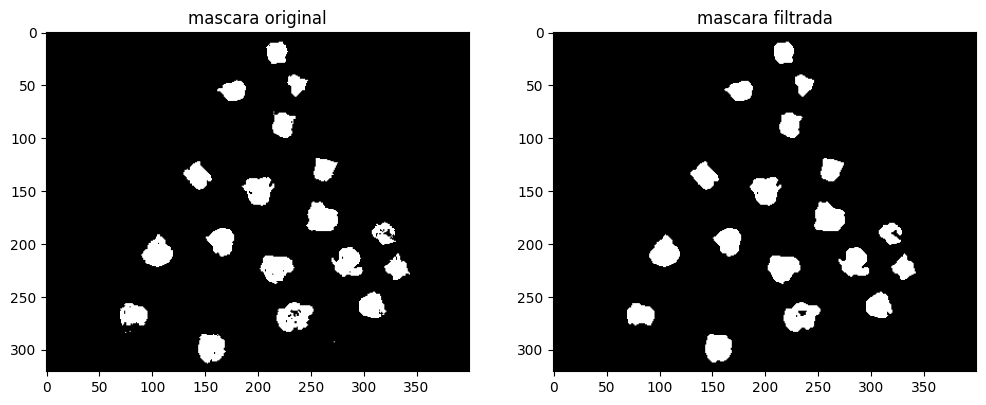

In [113]:
# exersice 4.2
# 2. Mejore la mascara, descartando informacion erronea (ruido) con el metodo que considere apropiado.
# Observacion: es posible que su proceso pueda ser usado luego del etiquetado.

# aplico un filtro de mediana para quitar aquellos pixeles molestos
filtered = cv2.medianBlur(segmented_image, 3)
# binarizo la mascara filtrada
mask_filtered = np.zeros_like(filtered)
mask_filtered[filtered > 0] = 255

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,12))
ax[0].imshow(mask_binary,cmap='gray')
ax[0].set_title('mascara original')
ax[1].imshow(mask_filtered,cmap='gray')
ax[1].set_title('mascara filtrada')
plt.show()

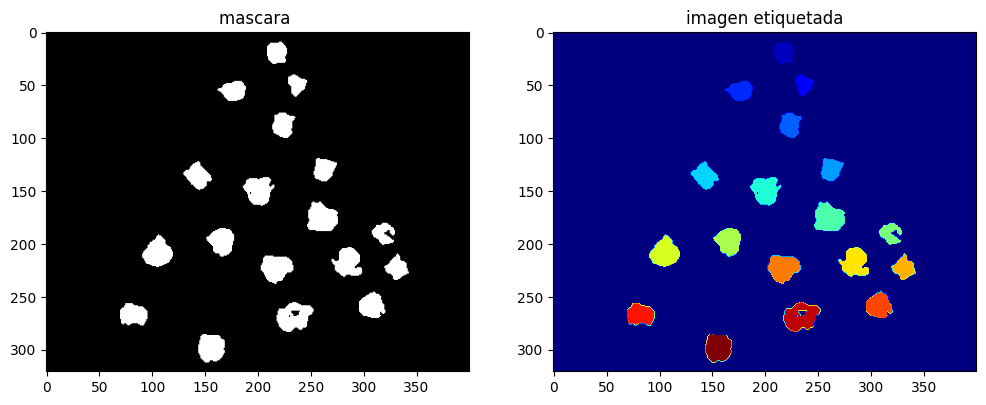

In [117]:
# exersice 4.3
# 3. Identifique las diferentes regiones por el metodo de etiquetado de componentes conectadas.
# ¿Podrıa obtener el mismo resultado utilizando el algoritmo de crecimiento de regiones? ¿Como lo aplicarıa?
# Modifique su implementacion previa, pruebela y saque conclusiones.

gray_mask = cv2.cvtColor(mask_filtered, cv2.COLOR_BGR2GRAY)

num_labels, labeled_image = cv2.connectedComponents(gray_mask)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,12))
ax[0].imshow(mask_filtered,cmap='gray')
ax[0].set_title('mascara ')
ax[1].imshow(labeled_image, cmap='jet')
ax[1].set_title('imagen etiquetada')
plt.show()

In [128]:
def ej4_4( threshold ):
  # crecimiento_region_recursivo(img, semilla, threshold1, threshold2)
  h_channel, s_channel, v_channel = cv2.split(img4_hsv)

  lower_red = np.array([img4_hsv[seed][0] - threshold, 100, 100])
  upper_red = np.array([img4_hsv[seed][0] + threshold, 255, 255])

  # mask = cv2.inRange(img4_hsv, lower_red, upper_red)

  img_crecimiento = crecimiento_region_recursivo(img4_hsv, seed, lower_red, upper_red)
  # img_crecimiento = crecimiento_region_recursivo(h_channel, seed, img4_hsv[seed][0] - threshold, img4_hsv[seed][0] + threshold)

  fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,12))
  ax[0].imshow(img4_gray, cmap='gray')
  ax[0].set_title('imagen original')
  ax[1].imshow(img_crecimiento, cmap='gray')
  ax[1].set_title('img crecimiento region')
  plt.show()

interact(ej4_4,
        threshold=widgets.IntSlider(min=0, max=255, step=1, value=5),
        )

interactive(children=(IntSlider(value=5, description='threshold', max=255), Output()), _dom_classes=('widget-i…

<function __main__.ej4_4(threshold)>

In [ ]:
# el metodo de segmentacion por color me deja todos los petalos de las flores,
# en cambio, el metodo de crecimiento recursivo tiene en cuenta a la flor donde esta la semilla, no puede conectarse con las demas flores

In [ ]:
# exersice 4.4
# 4. Cuente automaticamente la cantidad de rosas presente en la imagen original.
# Sobre la imagen original, dibuje un cırculo en el centro de cada rosa.



In [ ]:
# ======================== EXERSICE 5 =============================

In [ ]:
# 1. Realice un programa que le permita encontrar un objeto rectangular en una imagen, usted elija la imagen real y el objeto:
# una mesa, un teclado, un celular.
# Realice todos los procesamientos que considere necesarios.
# Ayuda: se restringe el uso a im´agenes donde los bordes del objeto esten paralelos a los bordes de la imagen.
# Utilice versiones rotadas de la imagen (90,180 y 270 grados) para comprobar la robustez del m´etodo.


In [ ]:
# 2. Estudie la implementacion de la TH para cırculos cv.HoughCircles.
# Utilizando la imagen ’latas.png’, realice un programa que:
# • cuente e informe el numero de latas,
# • que informe el numero de latas discriminando en grandes y pequeñas,
# Realice los preprocesamientos que crea necesarios, y puede probar la robustez de su implementacion rotando la imagen (180 grados).


In [ ]:
# 3. Implemente un codigo para segmentar en forma automatica la pista de aterrizaje principal en las imagenes de aeropuertos (corrientes ruidogris.jpg e
# iguazu ruidogris.jpg), las cuales poseen una combinacion de ruido gaussiano  e impulsivo. La salida del proceso debe ser la imagen restaurada
# con la pista principal coloreada (por ejemplo, con rectas rojas).
# Tenga en cuenta que el metodo debe ser util para imagenes de otros aeropuertos, con caracterısticas similares pero con variaciones
# en la localizacion, el largo de la pista, la inclinacion de la pista, etc.
# Para probar la robustez de su c´odigo, se le sugiere que genere imagenes rotadas y/o desplazadas de las propuestas.
